<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 3

In [1]:
# data prep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import dc_stat_think as dcst

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numba/errors.py:102: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
# data prep
swimtime_high_lanes = np.array([24.62, 22.9 , 27.05, 24.76, 30.31, 24.54, 26.12, 27.71, 23.15,
       23.11, 21.62, 28.02, 24.73, 24.95, 25.83, 30.61, 27.04, 21.67,
       27.16, 30.23, 21.51, 22.97, 28.05, 21.65, 24.54, 26.06])

swimtime_low_lanes = np.array([24.66, 23.28, 27.2 , 24.95, 32.34, 24.66, 26.17, 27.93, 23.35,
       22.93, 21.93, 28.33, 25.14, 25.19, 26.11, 31.31, 27.44, 21.85,
       27.48, 30.66, 21.74, 23.22, 27.93, 21.42, 24.79, 26.46])

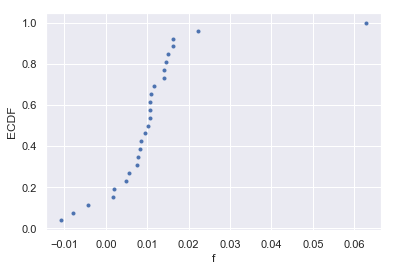

In [5]:
# Compute the fractional improvement of being in high lane: f
f = (swimtime_low_lanes - swimtime_high_lanes) / swimtime_low_lanes

# Make x and y values for ECDF: x, y
x,y = dcst.ecdf(f)

# Plot the ECDFs as dots
_ = plt.plot(x,y,marker='.', linestyle='none')

# Label the axes and show the plot
_ = plt.xlabel('f')
_ = plt.ylabel('ECDF')
plt.show()


In [6]:
# Compute the mean difference: f_mean
f_mean = np.mean(f)

# Draw 10,000 bootstrap replicates: bs_reps
bs_reps = dcst.draw_bs_reps(f, np.mean, size=10000)

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Print the result
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]""".format(f_mean, *conf_int))


mean frac. diff.: 0.01051
95% conf int of mean frac. diff.: [0.00612, 0.01592]


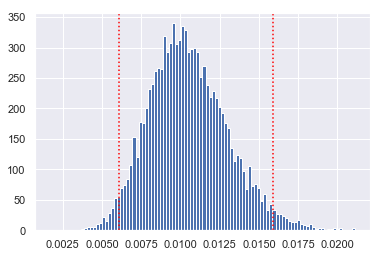

In [7]:
# extra visualisation
plt.hist(bs_reps, bins=100)
plt.axvline(conf_int[0], color='red', linestyle=':')
plt.axvline(conf_int[1], color='red', linestyle=':')
plt.show()

In [10]:
# Shift f: f_shift
f_shift = f - f_mean

# Draw 100,000 bootstrap replicates of the mean: bs_reps
bs_reps = dcst.draw_bs_reps(f_shift, np.mean, size=100000)

# Compute and report the p-value
p_val = np.sum(bs_reps >= f_mean) / 100000
print('p =', p_val)

p = 0.00024


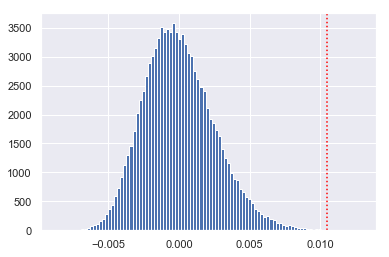

In [11]:
# extra visualisation
plt.hist(bs_reps, bins=100)
plt.axvline(f_mean, color='red', linestyle=':')
plt.show()

In [12]:
# data prep
swimtime_low_lanes_15 = np.array([27.66, 24.69, 23.29, 23.05, 26.87, 31.03, 22.04, 24.51, 21.86,
       25.64, 25.91, 24.77, 30.14, 27.23, 24.31, 30.2 , 26.86])

swimtime_high_lanes_15 = np.array([27.7 , 24.64, 23.21, 23.09, 26.87, 30.74, 21.88, 24.5 , 21.86,
       25.9 , 26.2 , 24.73, 30.13, 26.92, 24.31, 30.25, 26.76])

In [13]:
# Compute f and its mean
f = (swimtime_low_lanes_15 - swimtime_high_lanes_15) / swimtime_low_lanes_15
f_mean = np.mean(f)

# Draw 10,000 bootstrap replicates
bs_reps = dcst.draw_bs_reps(f, np.mean, size=10000)

# Compute 95% confidence interval
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Shift f
f_shift = f - f_mean

# Draw 100,000 bootstrap replicates of the mean
bs_reps = dcst.draw_bs_reps(f_shift, np.mean, size=100000)

# Compute the p-value
p_val = np.sum(bs_reps >= f_mean) / 100000

# Print the results
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]
p-value: {3:.5f}""".format(f_mean, *conf_int, p_val))


mean frac. diff.: 0.00079
95% conf int of mean frac. diff.: [-0.00188, 0.00335]
p-value: 0.28234


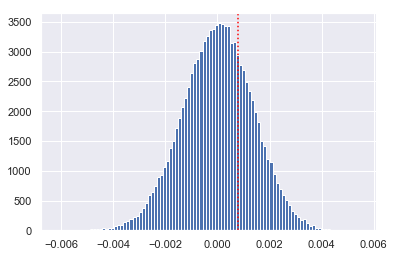

In [14]:
# extra visualisation
plt.hist(bs_reps, bins=100)
plt.axvline(f_mean, color='red', linestyle=':')
plt.show()

In [16]:
# data prep
f_13= np.array([-0.01562214, -0.0146381 , -0.00977673, -0.00525713,  0.00204104,
        0.00381014,  0.0075664 ,  0.01525869])

f_15 = np.array([-0.00516018, -0.00392952, -0.00099284,  0.00059953, -0.002424  ,
       -0.00451099,  0.00047467,  0.00081962])

lanes = np.array([1, 2, 3, 4, 5, 6, 7, 8])

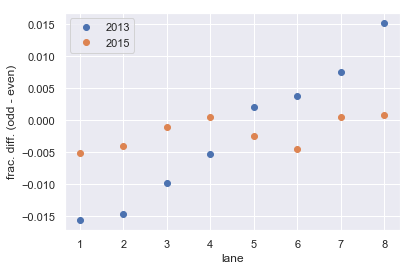

In [17]:
# Plot the the fractional difference for 2013 and 2015
_ = plt.plot(lanes, f_13, marker='.', markersize=12, linestyle='none')
_ = plt.plot(lanes, f_15, marker='.', markersize=12, linestyle='none')

# Add a legend
_ = plt.legend((2013, 2015))

# Label axes and show plot
_ = plt.xlabel('lane')
_ = plt.ylabel('frac. diff. (odd - even)')
plt.show()


slope: 0.00447 per lane
95% conf int: [0.00393, 0.00501] per lane


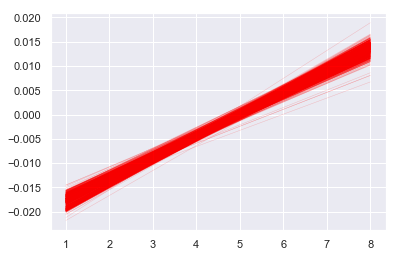

In [20]:
# Compute the slope and intercept of the frac diff/lane curve
slope, intercept = np.polyfit(lanes, f_13, 1)

# Compute bootstrap replicates
bs_reps_slope, bs_reps_int = dcst.draw_bs_pairs_linreg(lanes, f_13, 10000)

# Compute 95% confidence interval of slope
conf_int = np.percentile(bs_reps_slope, [2.5, 97.5])

# Print slope and confidence interval
print("""
slope: {0:.5f} per lane
95% conf int: [{1:.5f}, {2:.5f}] per lane""".format(slope, *conf_int))

# x-values for plotting regression lines
x = np.array([1,8])

# Plot 100 bootstrap replicate lines
for i in range(100):
    _ = plt.plot(x, bs_reps_slope[i] * x + bs_reps_int[i], 
                 color='red', alpha=0.2, linewidth=0.5)
   
# Update the plot
plt.draw()
plt.show()

In [21]:
# Compute observed correlation: rho
rho = dcst.pearson_r(lanes, f_13)

# Initialize permutation reps: perm_reps_rho
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the lanes array: scrambled_lanes
    scrambled_lanes = np.random.permutation(lanes)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_lanes, f_13)
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / 10000
print('p =', p_val)

p = 0.0001


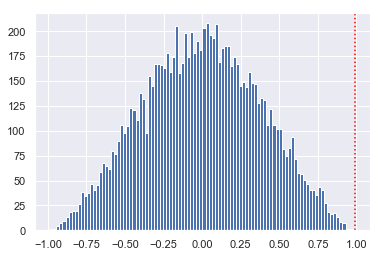

0.990


In [22]:
# extra visualisation
plt.hist(perm_reps_rho, bins=100)
plt.axvline(rho, color='red', linestyle=':')
plt.show()
print('{:.3f}'.format(rho))